<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_012_Image_Processing_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10

In [23]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Img_Size = 32

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [24]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
Y_test = Y_test.ravel()
Y_train = Y_train.ravel()

In [26]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)



# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [27]:
print(Y_train.shape)
print(X_train.shape)

(50000, 10)
(50000, 32, 32, 3)


In [28]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, epochs=15, batch_size=32)
print("Returned:", r)


Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6183 - accuracy: 0.4195
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0637 - accuracy: 0.6178
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9130 - accuracy: 0.6798
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7917 - accuracy: 0.7255
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7231 - accuracy: 0.7477
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6639 - accuracy: 0.7679
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6153 - accuracy: 0.7863
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5568 - accuracy: 0.8066
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5190 - accuracy: 0.8195
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.480

In [29]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy'])


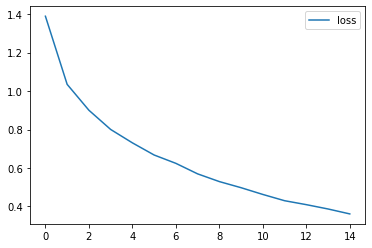

In [30]:

# plot some data
plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


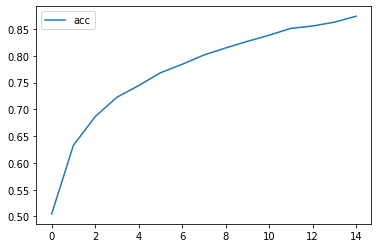

In [31]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
#plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [32]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 8 8 ... 5 4 7]


In [33]:
N_test = len(ynew)

In [34]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [35]:
# model.predict(X_test)

In [36]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [37]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[3 8 8 ... 5 1 7]


In [38]:
#Y_test[-2,:]

In [39]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [40]:
#target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.85      0.59      1000
           1       0.85      0.87      0.86      1000
           2       0.53      0.76      0.62      1000
           3       0.70      0.42      0.53      1000
           4       0.71      0.74      0.72      1000
           5       0.75      0.59      0.66      1000
           6       0.90      0.73      0.80      1000
           7       0.88      0.71      0.79      1000
           8       0.93      0.71      0.81      1000
           9       0.91      0.74      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.76      0.71      0.72     10000
weighted avg       0.76      0.71      0.72     10000

